
<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [4]:
# note: var1'de küçük nan var2'de ise büyük NaN oluşunun sebebi şudur ki; df oluştururken V1 sütununa sadece numeric değerler değil, aynı zamanda bir string değer olan '-' ibaresi de atandığı için (1 tane de olsa) tüm sütunun genel data tipi OBJECT olduğundan 'nan' değerleri küçük görüntülenir oysa, V2'deki tüm değerler numeric olduğundan 'NaN'değerleri büyük görüntülenir

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [5]:
df.info()  # Önce datayı inceleyelim.

# Ör: status kolonunda 3 tane değer olmayan hücre var. ancak sadece bir tane NaN görüyor. - olanları NaN olarak görmüyor.
# unique değerlere ve value_count lara bakarak verilerin daha detaylı incelenmesi gerekir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [6]:
type(np.nan) 
# bunların default tipi float dır.

float

In [7]:
type(np.NaN)

float

In [8]:
type(None)# tipi NoneType old. için bazı yerlerde hata almanıza sebep olabilir. Bunları np.nan lara çevirmek gerekebilir.

NoneType

In [9]:
type(df.var1)

pandas.core.series.Series

#### let's check types of vaues in salary column by their index

In [10]:
df.salary
# iki farklı null value (NaN ve None) var. Tür olarak en kapsayıcı hangisi ise serinin türü de o oluyor.

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [11]:
df.salary.dtype

dtype('O')

In [12]:
df.var2.dtype

dtype('float64')

In [13]:
# Yukarıdaki görüldüğü üzere salary sütununda 6. indexteki değer 'None' olduğu için tüm sütunun dtype'ı OBJECT oldu, aksi halde FLOAT olacaktı

# O zaman bu salary sütunu (OBJECT dtype) ile aynı tipte olmayan başka, mesela var2 sütunu (FLOAT64 dtype) ile bir işleme tabi tutamayız çünkü HATA VERİR

In [14]:
type(df.salary[0])
# Serimizin türü object. Sebebi none içermesi. Ancak 0. elemanının türü float.

float

In [15]:
type(df.salary[6])
# 6. elemanı none olduğu için türü nonetype.

NoneType

In [16]:
type(df.salary[1])
# 1. elemanı int.

int

In [17]:
# Let's play and check for a while
print(0 * np.nan)
print(np.nan == np.nan)
print(np.inf > np.nan)
print(np.nan - np.nan)
print(np.nan + np.nan)
print(np.nan - 10)
print(np.nan + 10)
print(np.nan in set([np.nan]))
print(0.3 == 3 * 0.1)

nan
False
False
nan
nan
nan
nan
True
False


In [18]:
np.nan is np.nan 

True

In [19]:
# let's remember df
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [20]:
df.status
# status kolonunun türü object.

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [21]:
type(df.status[2])
# 2. elemanının türü str.

str

In [22]:
type(df.status[10])

# status verileri LİSTE içerisinde df e girdiğinden ve liste içindeki elemanlar kendi dtype larını KORUYABİLDİKLERİ için bu kolondaki nan FLOAT kalmıştır.

float

In [23]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [24]:
type(df.var1[3])
# kolonda bulunan bir str (-) ifadeden dolayı nan ları da str yaptı. var1 oluşturulurken np.array içerisinde df e girdiğinden dtype ını KORUYAMADI ve içinde bulunan dominant dtype str (-) veriden dolayı nan veri de str oldu... NORMALDE nan verilerin dtype ları FLOAT tır.

str

In [25]:
type(df.var1[9])

str

In [26]:
type(df.var1[1])

str

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [27]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [28]:
# df.isnull()
df.isna()
# her ikiside aynı sonucu verir. null değerler için True, olmayanlar için False döndürür.

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [29]:
# df.notnull()
df.notna()
# her ikiside aynı sonucu verir. null olmayan değerler için True, olanlar için False döndürür.

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [30]:
df.isnull().any()

# default olarak .any(axis=0) dır
# bir tane bile null varsa True veir.
# status, dept, var2, slary kolonlarında null değer var.

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [31]:
df.isnull().any(axis=1)
# Sütun sütun bakar (axis=1) ama Row ları tamamını check eder ve null olup olmadığını gösterir.

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [32]:
df.isnull().sum()
# her sütunda kaç null değeri old. görmek için sum fonk. kullanılabilir.

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [33]:
df.isnull().sum().sum()
# TÜM df te toplamda kaç null değer olduğunu bulmak için

9

In [34]:
df.salary.isnull()
# salary kolonundaki null değerleri satır satır görebiliriz.

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [35]:
df.salary.isnull().any()
# salary sütununda bir tane bile null varsa True yoksa False döner.

True

In [36]:
df.salary.isnull().sum()
# salary sütunundaki toplam null değerini bulmak için

3

In [37]:
df.isnull().sum()
# bize her sütundaki null değerlerin toplamını veriyordu... o halde...

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [38]:
df.isnull().sum()/len(df)*100
# kolon/sütun bazında oransal (yüzdesel) olarak null miktarını bulmak için böyle bir kod yazabiliriz

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [39]:
df.isnull().any(axis=1)
# bu bize hangi satırlarda null lar olduğunu gösteriyordu... öyleyse...

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [40]:
df[df.isnull().any(axis=1)]
# ... yukarıdaki kodu []içine alır ve başına da df yazarsak TÜM df teki SADECE null değer içeren SATIRLARI alıp getirir...!

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [41]:
type(None)

NoneType

In [42]:
df[~df.isnull().any(axis=1)]
# null olmayan değer içeren kolonları seçmek için (~ işareti kendisinden sonra gelenin tam tersini yap 'NOT' demek)

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [43]:
df.loc[df.dept.isnull()]
# dept değerleri null olan satırları getirir

,id,gender,status,dept,var1,var2,salary
5,P006,F,PT,None,1,NaN,75
8,P009,M,PT,NaN,14,3.0,60


In [44]:
df.loc[~df.dept.isnull()]
# BAŞINA ~ işariti koyduğumuz için dept değerleri null OLMAYAN satırları getirir

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125
10,P011,M,NaN,AWS,6,9.0,NaN


In [45]:
df.loc[df.dept.isnull(), "salary"] 
# dept değeri null olanların salary'lerini bulmak için

5    75
8    60
Name: salary, dtype: object

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [46]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [47]:
# '-' gördüğüm yerleri değiştirmek istiyorum
df["var1"].map({"-":np.nan})
# Serideki tüm elemanları nan yapar. Biz bunu istemiyoruz. 'replace' metodunu kullanmamız daha mantıklı

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [48]:
df["var1"].replace(to_replace="-", value=np.nan)

# serimizdeki - olan elemanları nan yapmak için replace metodu kullanılır.

# to_replace parametresine değiştirmek istediğiniz değeri, value parametresine yeni değeri yazmalısınız.
# Ancak veri türüm halen object. Bunun nedei nan olması. Bunu dzüeltmek için type değişimi yapılmalıdır.
# ama burda da bir problem var: dtype hala OBJECT, ÇÜNKÜ 3. ve 6. satırlardaki nan lar hala str tipinde.. 

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

#### .astype("float") metodu

In [49]:
# o halde .astype metodunun devreye sokmamız lazım

In [50]:
df["var1"].replace(to_replace="-", value=np.nan).astype("float")
#Serideki elemanların türünü değiştirmek için

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [51]:
# 2. yol hem str hem de nan yapma AMA GARANTİ DEĞİL

df["var1"].replace(to_replace=["-", "NaN"], value=np.nan)

# bu şekilde de seri türü obj. olarak kaldı. Yani hem "-" value leri hem de str tipindeki 'nan' value leri np.nan a çevir dedik...!

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [52]:
df["var1"].replace(to_replace=["-", "nan"], value=np.nan).astype("float")
# Bir üstteki kod işe yaramadı (bazen yarasa da) o nedenle aynı kodun sonuna  .astype("float") parametresini ekledik ve dtype FLOAT oldu

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [53]:
df["var1"] = df["var1"].replace(to_replace="-", value=np.nan).astype("float")
df.var1
# şimdi bunu kalıcı hale getirelim

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [54]:
df.status
# Buradaki -'leri NaN' a çevirelim

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [55]:
df.status = df.status.replace("-", np.nan)
df.status
# Burada diğer veriler de str old. için Nan lar da str olarak kalabilir. type değişkliğine gerek yok.

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [56]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


### .df.COLUMN.map({})

In [57]:
df.gender.map({"M":1,"F":0})
# map metodu serideki tüm elemanlara belirttiğimiz değişiklikleri yapar.
df.gender.replace({"M":1,"F":0})
# yukarıda map ile yapılan işlemin aynısını replace metodu ile de yapabilirsiniz.
df["gender"].replace(["M","F"], [1,0])
# replace metodunu içine eski veriler ile yeni verileri liste şeklinde yazarak da kullanabiliriz.

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [58]:
df.gender
# görüldüğü gibi yukarıdaki değişiklikler KALICI OLMADI, çünkü bir değişkene atamamıştık

0     M
1     F
2     M
3     F
4     M
5     F
6     M
7     F
8     M
9     F
10    M
Name: gender, dtype: object

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [59]:
df
# df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [60]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)
# 1 tane bile NaN olan satırları silmek/düşmek için... görüldüğü gibi sadece içinde Null değeri bulunmayan 4. satırı getirdi, diğerlerini sildi
# bunlar zaten DEFAULT değerlerdir '(axis=0, how="any", thresh=None, inplace=False)'
# how="any" yani birisi bile null ise o satırı sil demek

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [61]:
df.dropna(axis=1, how="any", thresh=None, inplace=False)
# 1 tane bile NaN olan sütunları silmek/düşmek için... görüldüğü gibi sadece içinde Null değeri bulunmayan 'id' ve  'gender' sütunlarını getirdi, diğerlerini sildi
# how="any" yani birisi bile null ise o sütunu sil demek

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [62]:
df.dropna(axis=0, how="all", thresh=None, inplace=False)
# verilerinin tamamı NaN olan satırları silmek için
# how="all" yani o satırdaki verileri HEPSİ null ise o satırı sil demek... ki böyle bir satırımız olmadığı iiçin hiçbirisini silmedi

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [63]:
df.dropna(axis=1, how="all", thresh=None, inplace=False)
# verilerinin tamamı NaN olan sütunları silmek için
# how="all" yani o sütundaki verileri HEPSİ null ise o sütunu sil demek... ki böyle bir sütunumuz olmadığı iiçin hiçbirisini silmedi

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


* **``any``** : If any NA values are present, drop that row or column.
* **``all``** : If all values are NA, drop that row or column [Source](https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe).

In [64]:
df["delete_me"]=np.nan
# tüm değerleri null olan yeni bir sütun (delete_me) oluşturalım
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [65]:
df.dropna(axis=1, how="all", thresh=None, inplace=True)

# tüm verileri null olan sütunları silmek için, inplace=True KALICI olsun diye
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [66]:
# öncelikli olan thresh dir. all ya da any ye bakmaz.
# thresh: Require that many non-NA values

df.dropna(axis=1, how="all", thresh=9, inplace=False)

# 9'dan fazla null olmayan değer varsa o sütunu tutmak için thresh=9 kullandık.
# Burada all ya da any dikkate alınmaz.
# null olmayan değer sayısı 9'dan az olan sütunlar(axis=1 old. için) silinir.
# thresh=None yerine bir değer verdiğimiz için 'how=?' önemli değil

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [67]:
df.drop([1,3,5])
# 1,3,5. satırları index numarasına göre düşmek için
# axis=0 default

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [68]:
df.drop(["var1","var2"], axis=1)
# var1 ve var2 sütunlarını düşmek için
# axis=1 zorunlu

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


In [69]:
df.drop(columns=["var1","var2"])
# columns parametresi olarak girdiğimizda axis belirtmeye gerek yok.

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


 ## 2 - Filling Missing Values (Imputation)

In [70]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


 #### a.Filling with a specific value

In [71]:
df.fillna(0)
# df teki tüm null değerleri 0 ile doldurmak için (not: 0'lar ilgili sütunun dtype ını alır )

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


 #### b.Filling with any Proper Value

In [72]:
df.var1.mean()
# var1 sütunundaki null değerleri var1'in ortalaması ile doldurmak için

6.0

In [73]:
df.var1.fillna(df.var1.mean())
# sadece var1 sütunundaki null değerleri var1 sütununun ORTALAMASI ile ile doldurmak için

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [74]:
df.mean()
# uyarı verdi çünkü tüm sütunlar numeric değil, ama yine de çalıştı... şimdi var1, var2 ve salary sütunlarının ortalamalarını aldığımıza göre her sütunun ortalamasını o sütunda bulunan null değerlerin yerine koyalım

C:\Users\mehme\AppData\Local\Temp/ipykernel_1236/3103479976.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [75]:
df.fillna(df.mean())
#... şimdi var1, var2 ve salary sütunlarının ortalamalarını aldığımıza göre her sütunun ortalamasını o sütunda bulunan null değerlerin yerine koyalım
#... Ancak bu çok kullanılan bir yöntem değildir.

C:\Users\mehme\AppData\Local\Temp/ipykernel_1236/2524183911.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [76]:
df.fillna({"dept":"OTHER", "var1":df.var1.mean(), "var2":df.var2.median()})
# bu da harika...!

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,OTHER,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,OTHER,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


**where() Replace values where the condition is False.**

In [78]:
df.notna()
# bu bize null olmayan (notna) yerleri True, null olan yerleri False olarak verir

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [79]:
# ÖNEMLİ: where metodu False olan yerlere atama yapar.

df.where(cond=df.notna(), other=df.mean(), axis=1)  # null olan yerleri df. ortalamaları ile doldurmak için
# ancak .notna çok kullanılmaz onun yerine yukarıda anlatılan .fillna daha çok kullanılır

C:\Users\mehme\AppData\Local\Temp/ipykernel_1236/1750381341.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond=df.notna(), other=df.mean(), axis=1)  # null olan yerleri df. ortalamaları ile doldurmak için


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


In [80]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Fill NaN values using an *interpolation* method.**

In [81]:
df.interpolate()
# sadece sayısal veri içeren kolonlarda interpolate yaparak null değerleri doldurmak için kullanılır
# (yani sütun bazında, null değer/değerlerden bir önceki ve bir sonraki numeric değerlerin arasın eşit değerlere bölerek atama yapar)
# ÖRNEK olarak bir önceki tabloda satır3/var1 NaN idi, bunu bir önceki değer '5.0' ile bir sonraki değer olan '7.0' değerlerinin arasındaki değerle 'yani 6.0' ile değiştirdi... yine; var2 sütunundaki satır5 ve satır 6 NaN değerlerini aynı sütunun satır4 ve 7 değerlerini (11.0 ve 2.0) baz alarak bu iki değerin arasını eşit 2 değere bölerek (.linspace gibi) 8.0 ve 5.0 olarak yeni değerler atadı

# ANCAK salary sütunundaki NaN değerlerine bir atama yapamadı ÇÜNKÜ o sütunda ayrıca None değeri var!

# SONUÇ her halukarda bütün '-', 'None' vs gibi değerleri NaN'a çevirmek lazım HERŞEYDEN ÖNCE

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 #### c.Filling the Missing Values of Categorical Variables

In [82]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [86]:
# Kategorik değer içeren verilerin null değerleri mode, ffill, bfill özellikleri kullanılarak doldurulabilir.
df.dept.mode()

# dept kolonunun mode una bakınca üç değer verdi. mode ile null değerleri dolduramayız. Çünkü 3 tane sonuç verdi.

# Bunu çözmek için indexleme yapmalıyız.

0    AWS
1     DS
2     FS
dtype: object

In [88]:
df.dept.mode()[0]
# ilk mode değerimizi bulalım

'AWS'

In [89]:
df.dept.fillna(df.dept.mode()[0])

# dept kolonunun mode değerlerinden indexleme ile ilkini seçip, null değerleri seçtiğimiz mode değeri ile doldurabiliriz.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [98]:
np.random.choice(df.dept.mode())
# ya da istersek (yani birden fazla mode değeri olduğu için) mode değerlerimiz arasından herhangi birisini randomely seçmeyi de tercih edebiliriz... ki...

'FS'

In [101]:
df.dept.fillna(np.random.choice(df.dept.mode()))
# ... ki bu durumda dept sütunundaki NaN değer/değerler yerine randomely seçilen bir mode değeri atanacaktır

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [102]:
df["dept"].fillna(method="ffill")
# dept kolonundaki null değerleri kendisinden ÖNCEKİ değer ile doldurmak için ffill metodu kullanılır.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [103]:
df["dept"].fillna(method="bfill")
# dept kolonundaki null değerleri kendisinden SONRAKİ değer ile doldurmak için bfill metodu kullanılır.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

- **pad / ffill:** propagate last valid observation forward to next valid
- **backfill / bfill:** use next valid observation to fill gap.

 #### d.Filling by condition & by Group of the Categorical Variables 

In [105]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [106]:
df.dept.fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [107]:
df.loc[df["salary"]>=100, "status"]

# maaşı 100 den fazla olanların status'unun çoğunlukla FT old. görülmektedir.
# DOLAYISIYLA, maaşı 100'den fazla olan status'u null olanları FT olarak doldurabiliriz?
# ... ama önce bi bakalım inceleyelim... 
# ....maaşı 100K üzerinde olanların hepsi FT ama bi tane de NaN değerimiz var


3     FT
7    NaN
9     FT
Name: status, dtype: object

In [108]:
df.loc[df["salary"]<100, "status"]
#... incelemeye devam edelim...
# maaşı 100 den düşük olanların status'unun çoğunlukla PT old. görülmektedir.
# Bu nedenle maaşı 100'den düşük olanların null status değerlerini PT yapabiliriz.

# ....maaşı 100K altında olanların hepsi PT ama bi tane de NaN değerimiz var

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [109]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df  

# ÖNEMLİ: loc ile bu şekilde yapılan işlemlerde inplace çalışmıyor.
# Görüldüğü gibi işe yaramadı status sütunu içinde NaN değerleri aynı kaldı....

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [113]:
# .... öyleyse loc ile inplace çalışmadığı için bunun yerine atama ile değişiklikleri kalıcı hale getirebiliriz.
#... çalıştı ama yine status sütununun son satırından NaN değeri aynı kaldı... ÇÜNKÜ bizim yazdığımız condition'a göre salary sütununun son satırı da NaN...!
#... o zaman değiştiremediğimiz bu son satırdaki NaN değeri de değiştirmek için (status sütununun) yeni bir yöntem geliştirelim

df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"** just to try

In [119]:
# status kolonundaki son değerin salary sütununda da NaN değer olduğu için bu satırı yukarıda dolduramadık.
# Bunu doldurmak için gender ve dept'e göre gruplayarak stats mode larını bulalım.
# Bulduğumuz mode değerlerini kullanarak null değerleri dolduralım.

df.groupby(["gender", "dept"])["status"].apply(lambda x: x.mode()[0])
# .mode()'dan sonra indexing (.mode()[0] vb gibi..) yapmalıyız çünkü birden fazla mode değer var... ki birisini seçmemiz gerekir

# DİKKAT df.groupby(["gender", "dept"])["status"].mode() şeklinde yazsa idik hata verirdi...
# ...ANCAK numeric values barındıran sütunlar bağlamında sonuna .mean() veya .median() yazarsak çalışacaktır! df.groupby(["var1", "var2"])["salary"].mean()

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [120]:
df.groupby(["gender","dept"])["status"].transform(lambda x:x.mode()[0])

# Yukarıdaki işlemi transform ile yaptığımda df uzunluğunda bir sonuç elde ederek, 
# null değerleri doldurmak için bu sonucu kullanabilirim.

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [121]:
df["trans_status"] = df.groupby(["gender", "dept"
                                 ])["status"].transform(lambda x: x.mode()[0])

df

# görüldüğü gibi var olan status sütunundan başka bir de yeni trans_status adlı sütunumuz oldu...

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


In [123]:
df["status"].fillna(
    df["trans_status"], inplace=True
)  # ...şimdi status sütunumun son satırındaki NaN değeri trans_status adlı yeni oluşturduğum sütunun aynı satırındaki değer ile doldurarak NaN'dan kurtulalım...

df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [125]:
df.groupby("dept").salary.mean()

# dept. lere göre salary ortalamalarını bulmak için

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [126]:
df.groupby(["status","dept"]).salary.mean()

# status ve dept'e göre grupların salary ortalamalarını bulmak için

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

***** şimdi yukarıdaki gruplandırmalar ışığında TRANSFORM yapıp doldurmaları yapalım*****

In [127]:
df.groupby(["status","dept"]).salary.transform("mean")

# status ve dept'e göre grupların salary ortalamalarını df uzunluğuna yaymak (transform yapmak) için

# gruplandırmaya göre bir seri oluşturdu. Bunu kullanarak salary deki null değerleri dolduracağız.

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [129]:
df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")

df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75,FT,66.5
6,P007,M,FT,FS,NaN,NaN,None,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125,FT,125.0


In [130]:
df.salary.fillna(df.trans_salary, inplace=True)

df

# salary kolonundaki null değerleri status ve dept'e göre gruplayıp,
# gruplara göre salary ortalamalarını bularak ve transform ederek trans_salary sütununu oluşturduk.
# trans_salary verilerini kullanarak salary sütunundaki null değerleri DOLDURDUK.

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [133]:
df.groupby("gender").var1.mean()

gender
F    4.666667
M    6.800000
Name: var1, dtype: float64

In [134]:
df.groupby(["gender", "status"]).var1.mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [140]:
# ...transform edelim ve bunu bir değişkene atayalım...
trans_var1 = df.groupby(["gender", "status"]).var1.transform("mean")

trans_var1

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [135]:
df["trans_var1"]= df.groupby(["gender", "status"]).var1.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0,10.0


In [149]:
# ...şimdi var1 sütunumuzdaki NaN değerleri trans_var1 değerleri ile doldurarak işlemi tamamlayalım...


df.var1.fillna(trans_var1, inplace=True)

# veya df.var1.fillna(df["trans_var1"], inplace=True)

df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0,10.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [154]:
df.groupby("status").var2.mean()

# veya df.groupby(["status"]).var2.mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [163]:
# ... ya da hem status hem de dept sütunlarına göre gruplandırıp, mean lerini de alıp transform edip bir değişkene atayarak DOĞRUDAN .fillna ile (aşağıda) doldurma da yapabiliriz...

trans_var2 = df.groupby(["status", "dept"]).var2.transform("mean")

trans_var2

0     7.500
1     5.000
2     7.000
3     8.000
4     9.000
5     9.000
6     4.125
7     4.125
8     5.000
9     7.500
10    7.000
Name: var2, dtype: float64

In [165]:
# ...şimdi yukarıda transform ederek oluşturduğumuz trans_var2 sütunumuz ile var2 sütunumuzdaki NaN değerlerimizi KALICI (inplace=True) olarak dolduralım..

df.var2.fillna(trans_var2, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0


In [166]:
# ... ya da DOĞRUDAN yalnızca status sütununa göre gruplandırıp... ortalamasını... alıp .fillna ile yine KALICI olarak (inplace=True) var2 sütunumuzu doldurabiliriz...w

df.var2.fillna(df.groupby("status").var2.transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0


#### bunlar da İLKNUR HOCA'nın var1 ve var2 sütunlarındaki null değerlerin doldurulması ile ilgili çözümleri....

**** bu var1 sütunu için* ***

In [170]:
df.groupby("gender").var1.mean()

gender
F    6.8
M    6.0
Name: var1, dtype: float64

In [171]:
df.groupby(["gender", "status"]).var1.mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [172]:
df["trans_var1"]= df.groupby(["gender", "status"]).var1.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0


In [173]:
df.var1.fillna(df["trans_var1"], inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0


**** bu da var2 sütunu için* ***

In [175]:
df.groupby("status").var2.mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [176]:
df.groupby("status").var2.transform("mean")

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [177]:
df.var2.fillna(df.groupby("status").var2.transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary,trans_var1
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0,2.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0,2.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0,8.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0,10.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5,8.0
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5,2.0
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0,2.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0,10.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0,8.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0,10.0


## filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [180]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [181]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


<AxesSubplot:>

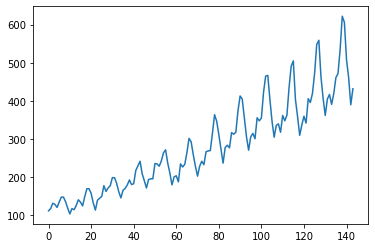

In [183]:
flights.passengers.plot()

***** *let's manipulate flights df* ***

In [208]:
# Originali aynı kalsın biz kopyasını alalım...

flights_copy = flights.copy()

In [209]:
# df.loc[,] şeklinde indexliyorduk... df'imizde 0-143 arası index no var normalde biz ilk ve son değer dahil olmayacak şekilde (1,144) arasında yazarak 0 ve 143 nolu indexler DAHİL OLMASIN istedik (çünkü interpolate yaptığımızda baştaki ve sondaki değerleri yakalayamayabilir...) ve bu şekilde RANDOMELY 20 tane index no (integer) üretecek...
# not burada sütun kısmına (yani .loc[rows,columns]) kısmına str olarak doğrudan sütun ismini, yani 'passenger' yazacağımız için .iloc[,] yerine .loc[] metodunu KULLANDIK
flights_copy.loc[np.random.randint(1,144,20), "passengers"]

140    508
89     374
102    465
7      148
99     348
60     204
43     242
33     162
113    435
66     302
97     301
53     243
103    467
24     145
34     146
79     347
79     347
39     181
72     242
40     183
Name: passengers, dtype: int64

In [210]:
#... şimdi bunların yerine (yukarıdaki kodu aynen kopyalayarak) = np.nan atayalım...
# not: aslında '= np.nan' ifadesini yukarıdaki satıra doğrudan da yazabilirdik...

flights_copy.loc[np.random.randint(1,144,20), "passengers"] = np.nan

In [212]:
# ... bakalık passenger sütununa kaç tane np.nan atamış...?
#... görüldüğü gibi 20 tane yazdığımız halde 19 tane atamış... ÇÜNKÜ demek ki 2 satır AYNI imiş.... 

flights_copy.isnull().sum()

year           0
month          0
passengers    19
dtype: int64

<AxesSubplot:>

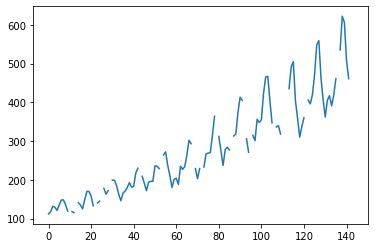

In [214]:
flights_copy.passengers.plot()

# görülüdüğü gibi passenger sütunumuzdaki NaN değerler grafikte de açıkça görülüyor...

*** *şimdi bu NaN değerlerin yerine *interpolate ile atama yapalım* ***

In [215]:
flights_copy.passengers.interpolate()

0      112.0
1      118.0
2      132.0
3      129.0
4      121.0
       ...  
139    606.0
140    508.0
141    461.0
142    446.5
143    432.0
Name: passengers, Length: 144, dtype: float64

*** *şimdi HER İKİ GRAFİĞİ KARŞILAŞTIRMALI OLARAK ÜST ÜSTE (overlapped) görelim....* ***

<AxesSubplot:>

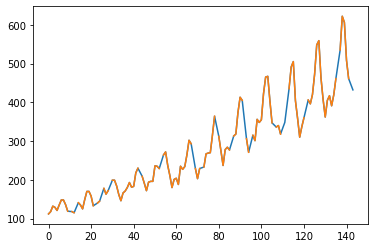

In [220]:
# ve atamadan sonra grafiği tekrar görelim..., hatta karşılaştıralım

# not: aşağıdaki grafikteki TURUNCU çizgiler ÖNCEKİ (NaN'lı) GRAFİĞE aittir... MAVİ VE TURUNCU çizgiler YENİ (atamadan sonraki) grafiğe ait olup, MAVİ ÇİZGİLER NaN DEĞERLERİN bulunduğu (ancak kapatıldığı) yerleri göstermektedir...

# DİKKAT: her iki grafiği ik farklı renkte ve aynı tabloda ÜST ÜSTE görebilmek için ÖNCE YENİ GRAFİĞİN KODUNU yazıp sonuna ',' koymamız ve SONRA DA alta ESKİ GRAFİĞİN KODUNU yazmamız gerekir

flights_copy.passengers.interpolate().plot(),
flights_copy.passengers.plot()

<AxesSubplot:>

<AxesSubplot:>

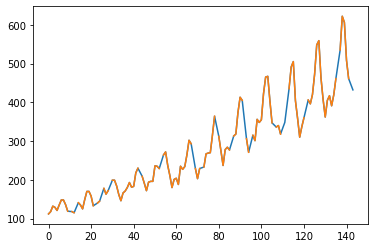

In [229]:
# böyle de yazılabilir...
""" print(flights_copy.passengers.interpolate().plot(),flights_copy.passengers.plot()) """
# ...veya böyle
display(flights_copy.passengers.interpolate().plot(),flights_copy.passengers.plot())

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________